<a href="https://colab.research.google.com/github/BxMild/Data-warehouse-2024/blob/main/Data_Preprocessing_67.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing
### Data Preprocessing, Data Visualization, Data Analysis

ชื่อ:ปีย์รดา ภู่ถนนนอก

กำหนดส่ง: อาทิตย์ 8 กันยายน 2567 (NO EXTENSION!)

**ผลที่คาดหวังจากการทำงานนี้**
* สามารถใช้ Python ในการอ่านข้อมูล
* จัดการกับข้อมูลเบื้องต้นก่อนนำไปวิเคราะห์
* สามารถวิเคราะห์ข้อมูลเบื้องต้นด้วยการสร้าง Data Visualization และ Pivot Tables

**สิ่งที่ต้องมีในการทำงานนี้**
* มีการติดตั้ง Python ในเครื่องคอมพิวเตอร์

**Python libraries ที่ใช้ในงานนี้:**
* Pandas (pandas.pydata.org)
* Matplotlib (matplotlib.org)

** NOTE **
* อย่าลืมบันทึกงานที่ทำในโน้ตบุ๊คนี้เป็นประจำขณะทำงาน มิเช่นนั้นงานที่ทำอยู่อาจสูญหายได้
* **เริ่มทำแต่เนิ่น ๆ อย่ารอที่จะทำก่อนส่ง เพราะจะทำไม่เสร็จ เนื่องจากปัญหามากมายที่จะเกิดขึ้นระหว่างการทำงาน และอาจารย์ไม่รับปรึกษาในคืนก่อนส่ง**
----------------------

In [11]:
"""
หากไม่สามารถลง library ใด ให้ดาวน์โหลดดังตัวอย่างต่อไปนี้
!pip3 install numpy
"""
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [12]:
# reading data sets from Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Titanic Data Set
* (10 points) ข้อมูล Titanic เป็นหนึ่งในชุดข้อมูลที่ได้รับความนิยมมากที่สุดในแวดวงการเรียนรู้การวิเคราะห์ข้อมูลและการสร้างโมเดลทางสถิติหรือการเรียนรู้ของเครื่อง (Machine Learning) ชุดข้อมูลนี้มาจากเหตุการณ์เรือ Titanic ซึ่งเป็นเรือสำราญที่ใหญ่ที่สุดในยุคนั้น และเกิดอับปางในปี 1912 ทำให้มีผู้เสียชีวิตจำนวนมาก
    ข้อมูลนี้ประกอบด้วยรายละเอียดของผู้โดยสารบนเรือ Titanic เช่น อายุ เพศ ชั้นที่นั่ง (Pclass) ค่าโดยสาร (Fare) จำนวนญาติพี่น้องหรือคู่สมรสบนเรือ (SibSp) และสถานที่ขึ้นเรือ (Embarked) โดยมีเป้าหมายหลักในการวิเคราะห์หรือการสร้างโมเดลคือการทำนายว่าผู้โดยสารคนนั้นจะรอดชีวิต (Survived) หรือไม่จากการอับปางของเรือ Titanic \
    https://www.kaggle.com/datasets/vinicius150987/titanic3/data

<center><img src="https://www.pigeonforgetncabins.com/wp-content/uploads/2015/06/experience-at-titanic-pigeon-forge.jpg" alt="titanic" width="400"/></center>

In [24]:
path_titanic = '/content/drive/MyDrive/titanic3.xlsx'

In [27]:
titanic = pd.read_excel(path_titanic)
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


##**(10 points) จากข้อมูลที่ให้มา มีค่าว่างสูญหายมากน้อยแค่ไหน?**
 และมีค่าผิดปกติ (outliers) และหรือข้อมูลรบกวน (noisy data) หรือไม่ในแต่ละตัวแปร?

In [28]:
titanic.isna().sum()

,0
pclass,0
survived,0
name,0
sex,0
age,263
sibsp,0
parch,0
ticket,0
fare,1
cabin,1014


In [30]:
titanic.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


## **(10 points) จากข้อมูลที่ให้มา เตรียมข้อมูลให้พร้อมโดยการจัดการกับค่าว่างในข้อมูล ให้อธิบายวิธีที่ท่านเลือกใช้ พร้อมยกเหตุผลประกอบ**

In [34]:
# จัดการกับค่าว่างในตัวแปรต่างๆ

# แทนที่ค่าว่างใน age ด้วยค่าเฉลี่ย
##เพราะการคำนวณจากค่ากลางจะช่วยให้ข้อมูลไม่เบี่ยงเบนเกินไปและยังคงความสมดุล
##เนื่องจากอายุเป็นตัวแปรเชิงปริมาณ ค่าเฉลี่ยสามารถแทนที่ได้โดยไม่ทำให้การวิเคราะห์ผิดเพี้ยนมากเกินไป
titanic['age'].fillna(titanic['age'].mean(), inplace=True)

# แทนที่ค่าว่างใน boat ด้วย 'No Boat'
##การที่ไม่มีข้อมูลหมายถึงผู้โดยสารไม่ได้อยู่บนเรือชูชีพ ดังนั้นควรใช้วิธีการเติมค่าเป็นศูนย์หรือคำอธิบายที่เหมาะสม
titanic['boat'].fillna('0', inplace=True)

# แทนที่ค่าว่างใน body ด้วยค่า 0
##แทนค่าที่หายไปด้วยค่า 0 เพื่อแสดงว่าร่างกายไม่ได้ถูกพบ
##การไม่มีข้อมูลรหัสร่างกายอาจแปลว่าไม่พบร่าง ดังนั้นจึงเติมค่าเป็น 0 ได้อย่างเหมาะสม
titanic['body'].fillna(0, inplace=True)

# แทนที่ค่าว่างใน home.dest ด้วย 'Unknown'
##การเติมข้อมูลด้วย Unknown ช่วยรักษาความสมบูรณ์ของข้อมูลและไม่ได้ทำให้การวิเคราะห์เบี่ยงเบน
titanic['home.dest'].fillna('Unknown', inplace=True)

# เติมค่าว่างใน 'cabin' ด้วย 'Unknown'
titanic['cabin'].fillna('Unknown', inplace=True)

# แทนที่ค่าว่างใน 'embarked' ด้วย 'Unknown'
titanic['embarked'].fillna('Unknown', inplace=True)

# แทนค่าว่างใน 'fare' ด้วย 0
titanic['fare'].fillna(0, inplace=True)

# ตรวจสอบค่าว่างอีกครั้งเพื่อยืนยันว่าค่าว่างถูกจัดการทั้งหมดแล้ว
missing_data_after = titanic.isnull().sum()
missing_data_after

,0
pclass,0
survived,0
name,0
sex,0
age,0
sibsp,0
parch,0
ticket,0
fare,0
cabin,0


In [35]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,0.0,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,0.0,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,No Boat,0.0,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,No Boat,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,No Boat,0.0,"Montreal, PQ / Chesterville, ON"


##**แปลงข้อมูลเชิงคุณภาพให้เป็นตัวเลข**
    i. (10 points) ใช้ one-hot encoding ในการแปลงตัวแปร Embarked \
    ii. (10 points) แปลงตัวแปร Sex โดยให้เพศชายเป็น 0 และเพศหญิงเป็น 1 \
    iii. (10 points) สร้างตัวแปร FamilySize ซึ่งเป็นผลรวมของตัวแปร SibSp (number of siblings/spouses aboard) และ Parch (number of parents/children aboard) \
    iv. (10 points) สร้างตัวแปร IsAlone ซึ่งมีค่าเป็น 1 ถ้า FamilySize เป็น 0, และมีค่าเป็นศูนย์เมื่อเป็นอื่น

In [36]:
# ใช้ one-hot encoding สำหรับตัวแปร 'embarked'
titanic_encoded = pd.get_dummies(titanic, columns=['embarked'], prefix='embarked')

# แปลงตัวแปร 'sex' โดยให้เพศชายเป็น 0 และเพศหญิงเป็น 1
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})

# สร้างตัวแปร 'FamilySize'
titanic['FamilySize'] = titanic['sibsp'] + titanic['parch']

# สร้างตัวแปร 'IsAlone'
titanic['IsAlone'] = (titanic['FamilySize'] == 0).astype(int)

titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,FamilySize,IsAlone
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.0000,0,0,24160,211.3375,B5,S,2,0.0,"St Louis, MO",0,1
1,1,1,"Allison, Master. Hudson Trevor",0,0.9167,1,2,113781,151.5500,C22 C26,S,11,0.0,"Montreal, PQ / Chesterville, ON",3,0
2,1,0,"Allison, Miss. Helen Loraine",1,2.0000,1,2,113781,151.5500,C22 C26,S,No Boat,0.0,"Montreal, PQ / Chesterville, ON",3,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.0000,1,2,113781,151.5500,C22 C26,S,No Boat,135.0,"Montreal, PQ / Chesterville, ON",3,0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1,2,113781,151.5500,C22 C26,S,No Boat,0.0,"Montreal, PQ / Chesterville, ON",3,0


## **ทำการ Normalize ข้อมูล**
    i. (10 points) ตัวแปร Fare และ Age ใช้ Min-Max Scaling \
    ii. (10 points) สร้างตัวแปรใหม่ Fare_Per_Person ด้วยการนำตัวแปร Fare มาหารด้วย FamilySize + 1 \
    iii. (10 points) สร้างตัวแปร AgeGroup ที่ระบุกลุ่มอายุของตัวอย่าง โดยแบ่งเป็นกลุ่มดังนี้ [0, 12), [12, 18), [18, 50) และ [50, 100)

In [42]:
from sklearn.preprocessing import MinMaxScaler

# สร้าง scaler สำหรับ Min-Max Scaling
scaler = MinMaxScaler()

# ปรับขนาดข้อมูลสำหรับ 'Fare' และ 'Age'
titanic[['fare', 'age']] = scaler.fit_transform(titanic[['fare', 'age']])

In [43]:
# สร้างตัวแปร 'Fare_Per_Person'
titanic['Fare_Per_Person'] = titanic['fare'] / (titanic['FamilySize'] + 1)

In [44]:
# สร้างตัวแปร 'AgeGroup'
def categorize_age(age):
    if age < 12:
        return '[0, 12)'
    elif age < 18:
        return '[12, 18)'
    elif age < 50:
        return '[18, 50)'
    else:
        return '[50, 100)'

titanic['AgeGroup'] = titanic['age'].apply(categorize_age)

In [49]:
print(titanic.head())

   pclass  survived                                             name  sex  \
0       1         1                    Allen, Miss. Elisabeth Walton    1   
1       1         1                   Allison, Master. Hudson Trevor    0   
2       1         0                     Allison, Miss. Helen Loraine    1   
3       1         0             Allison, Mr. Hudson Joshua Creighton    0   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)    1   

        age  sibsp  parch  ticket      fare    cabin embarked     boat   body  \
0  0.361169      0      0   24160  0.412503       B5        S        2    0.0   
1  0.009395      1      2  113781  0.295806  C22 C26        S       11    0.0   
2  0.022964      1      2  113781  0.295806  C22 C26        S  No Boat    0.0   
3  0.373695      1      2  113781  0.295806  C22 C26        S  No Boat  135.0   
4  0.311064      1      2  113781  0.295806  C22 C26        S  No Boat    0.0   

                         home.dest  FamilySize  Is

##**(10 points) นำเสนอการแจกแจงหรือทำความเข้าใจตัวแปรสำคัญในข้อมูล เช่น Age, Fare, and Pclass ด้วยการสร้างฮิสโตแกรมหรือแผนภาพกล่อง**

**คำอธิบายกราฟ**
1. ฮิสโตแกรม (Histogram)
  - ใช้เพื่อดูการกระจายของข้อมูลในช่วงต่างๆ
kde=True
  - เพิ่มการประมาณการความหนาแน่นของข้อมูล
2. แผนภาพกล่อง (Boxplot)
  - ใช้เพื่อดูการกระจายของข้อมูล รวมถึงค่าผิดปกติ (outliers)
  - แสดง quartiles และค่าต่ำสุด/สูงสุด
  
**ผลลัพธ์ที่คาดหวัง**

  Age:
  - ฮิสโตแกรมแสดงการกระจายอายุของผู้โดยสาร
  - แผนภาพกล่องแสดงช่วงอายุและค่าผิดปกติ

Fare:
  - ฮิสโตแกรมแสดงการกระจายของค่าโดยสาร
  - แผนภาพกล่องแสดงช่วงของค่าโดยสารและค่าผิดปกติ

Pclass:
  - ฮิสโตแกรมแสดงการกระจายของชั้นโดยสาร
  - แผนภาพกล่องแสดงการกระจายของข้อมูลชั้นโดยสาร


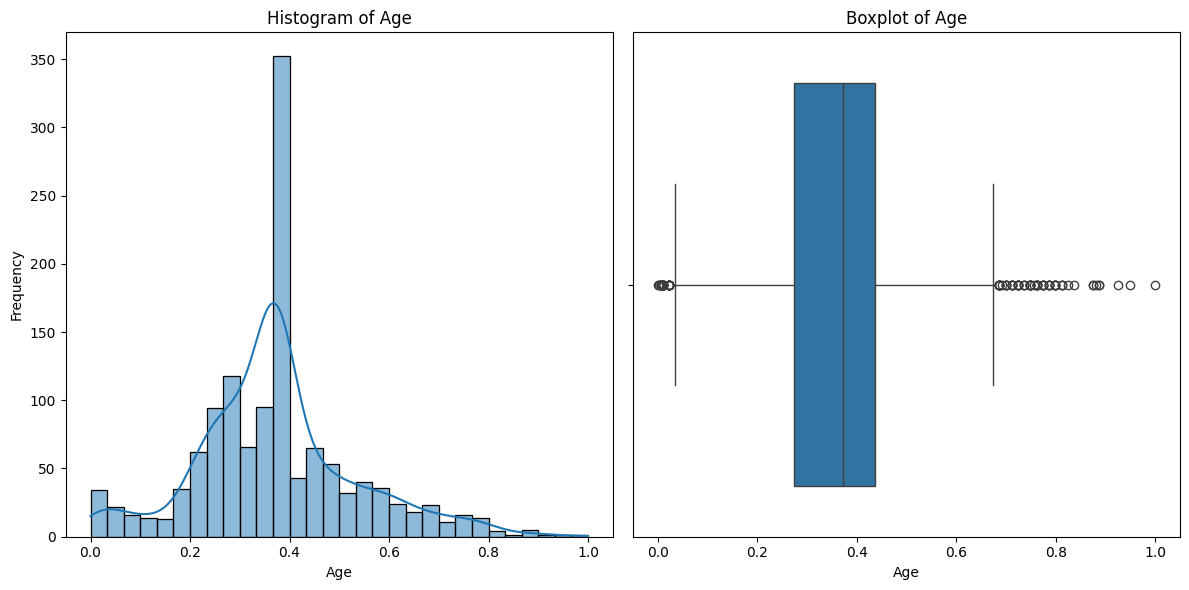

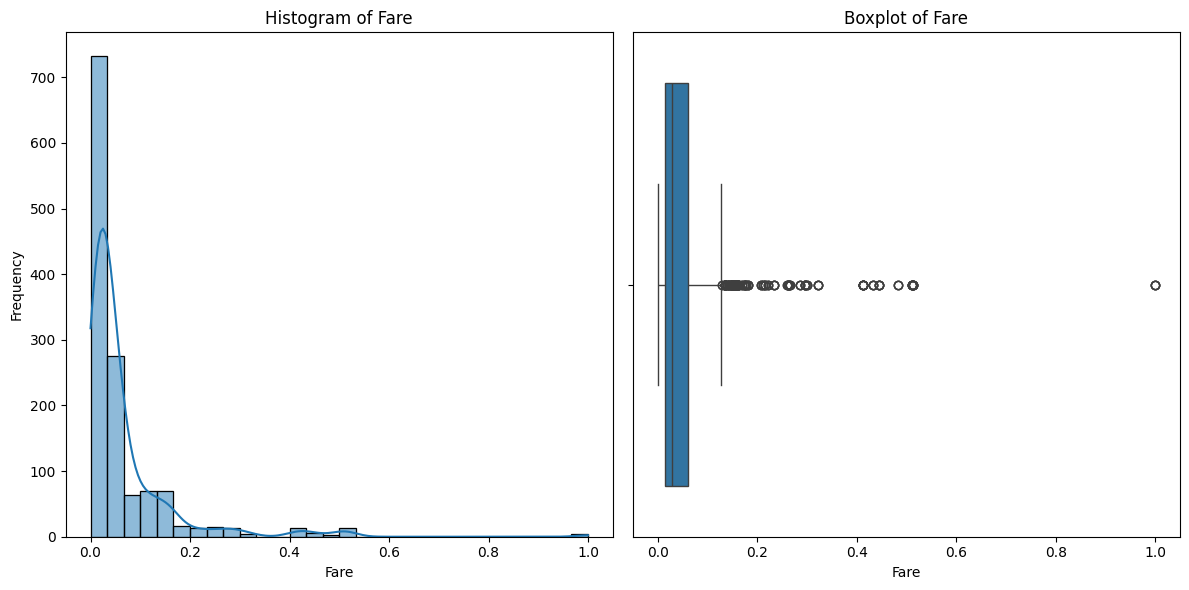

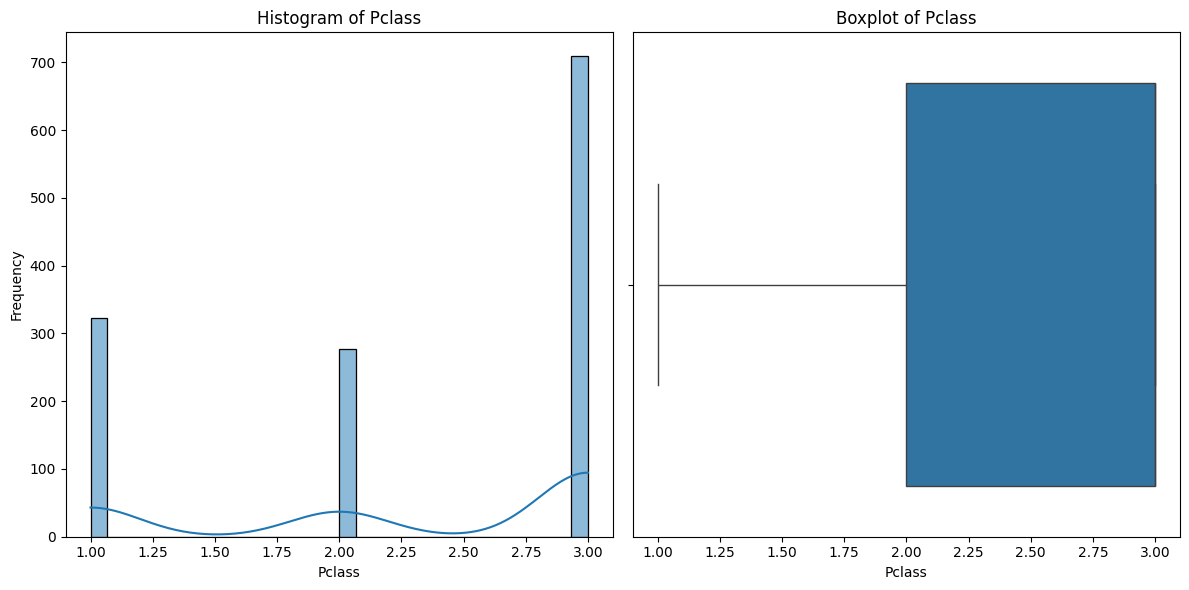

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# แสดงกราฟฮิสโตแกรมและแผนภาพกล่องสำหรับตัวแปรสำคัญ
def plot_histogram_and_boxplot(df, column, title):
    plt.figure(figsize=(12, 6))

    # ฮิสโตแกรม
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Histogram of {title}')
    plt.xlabel(title)
    plt.ylabel('Frequency')

    # แผนภาพกล่อง
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {title}')
    plt.xlabel(title)

    plt.tight_layout()
    plt.show()

# ใช้งานฟังก์ชันเพื่อสร้างกราฟสำหรับตัวแปรสำคัญ
plot_histogram_and_boxplot(titanic, 'age', 'Age')
plot_histogram_and_boxplot(titanic, 'fare', 'Fare')
plot_histogram_and_boxplot(titanic, 'pclass', 'Pclass')


## **เมื่อเตรียมข้อมูลพร้อมแล้ว ให้หาความสัมพันธ์ของตัวแปรต่อไปนี้จากข้อมูล ซึ่งอาจนำเสนอด้วยสถิติและแผนภูมิหรือกราฟก็ได้:**
    i. (10 points) survived และ pclass \
    ii. (10 points) survived และ sex \
    iii. (10 points) survived และ age \
    iv. (10 points) จำนวนสมาชิกครอบครัวที่รอดชีวิต และ Fare

In [52]:
# คำนวณค่าเฉลี่ยของการรอดชีวิต (survived) ตามชั้นโดยสาร (pclass)
survival_pclass = titanic.groupby('pclass')['survived'].mean()
print("Survival rate by Pclass:")
print(survival_pclass)

Survival rate by Pclass:
pclass
1    0.619195
2    0.429603
3    0.255289
Name: survived, dtype: float64


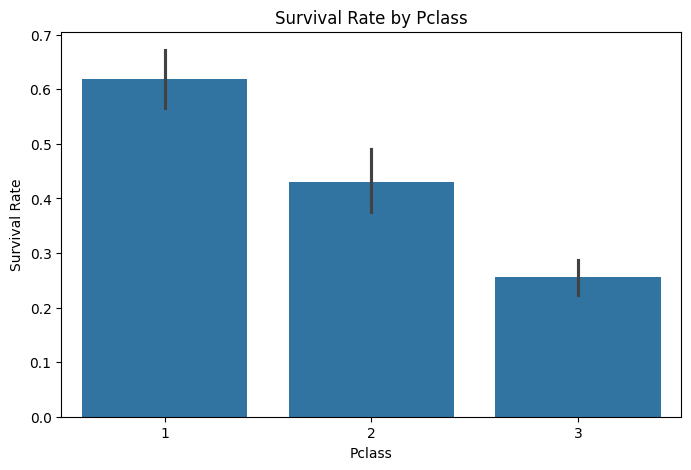

In [53]:
plt.figure(figsize=(8, 5))
sns.barplot(x='pclass', y='survived', data=titanic, estimator=np.mean)
plt.title('Survival Rate by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Survival Rate')
plt.show()

In [54]:
# คำนวณค่าเฉลี่ยของการรอดชีวิต (survived) ตามเพศ (sex)
survival_sex = titanic.groupby('sex')['survived'].mean()
print("Survival rate by Sex:")
print(survival_sex)

Survival rate by Sex:
sex
0    0.190985
1    0.727468
Name: survived, dtype: float64


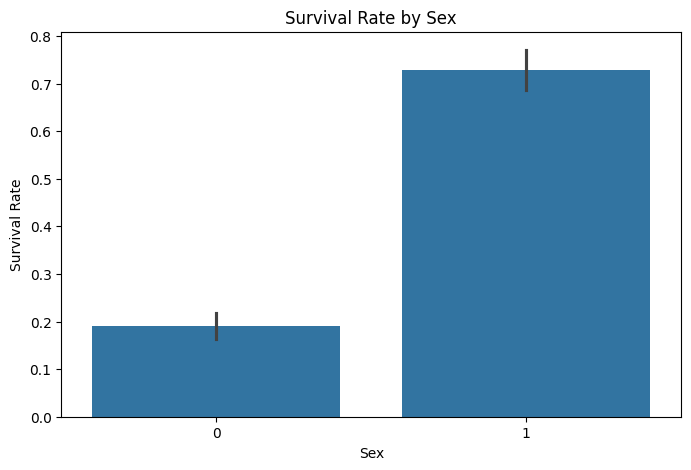

In [55]:
plt.figure(figsize=(8, 5))
sns.barplot(x='sex', y='survived', data=titanic, estimator=np.mean)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

In [56]:
# คำนวณค่าเฉลี่ยของการรอดชีวิต (survived) ตามช่วงอายุ (age)
survival_age = titanic.groupby(pd.cut(titanic['age'], bins=[0, 12, 18, 50, 100]))['survived'].mean()
print("Survival rate by Age Group:")
print(survival_age)

Survival rate by Age Group:
age
(0, 12]      0.381498
(12, 18]          NaN
(18, 50]          NaN
(50, 100]         NaN
Name: survived, dtype: float64


<ipython-input-56-e1ed20971556>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_age = titanic.groupby(pd.cut(titanic['age'], bins=[0, 12, 18, 50, 100]))['survived'].mean()


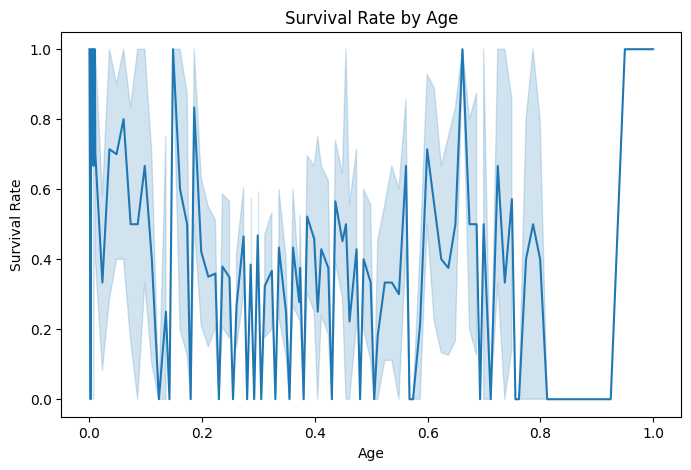

In [57]:
plt.figure(figsize=(8, 5))
sns.lineplot(x=titanic['age'], y=titanic['survived'])
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Survival Rate')
plt.show()

In [59]:
# คำนวณ FamilySize
titanic['FamilySize'] = titanic['sibsp'] + titanic['parch']

# คำนวณค่าเฉลี่ยของการรอดชีวิต (survived) ตาม FamilySize
survival_fares = titanic.groupby('FamilySize')['fare'].mean()
print("Average Fare by FamilySize:")
print(survival_fares)

Average Fare by FamilySize:
FamilySize
0     0.042419
1     0.099991
2     0.081132
3     0.099909
4     0.156281
5     0.169971
6     0.055425
7     0.091543
10    0.135753
Name: fare, dtype: float64


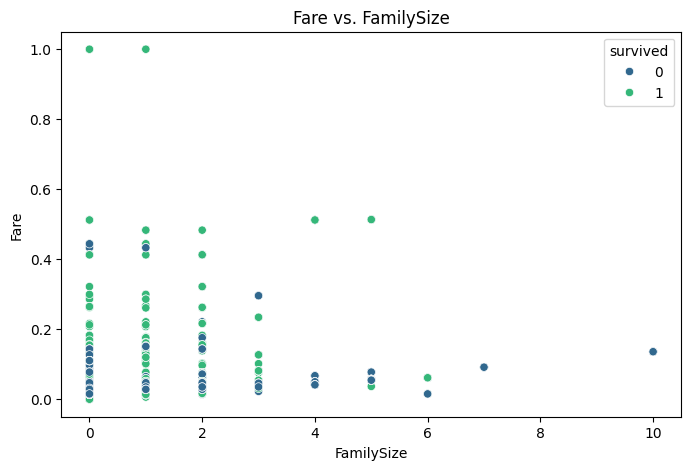

In [61]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='FamilySize', y='fare', data=titanic, hue='survived', palette='viridis')
plt.title('Fare vs. FamilySize')
plt.xlabel('FamilySize')
plt.ylabel('Fare')
plt.show()

##**(10 points) สร้างตารางสรุปข้อมูลเพื่อหาคุณลักษณะของผู้โดยสารเรือไททานิค และศึกษาเกี่ยวกับการเสียชีวิตของผู้โดยสาร ทำการสรุปผลที่ได้จากตาราง**

In [62]:
# สรุปข้อมูลพื้นฐาน
summary = pd.DataFrame({
    'Count': titanic[['age', 'fare', 'FamilySize']].count(),
    'Mean': titanic[['age', 'fare', 'FamilySize']].mean(),
    'Std': titanic[['age', 'fare', 'FamilySize']].std(),
    'Min': titanic[['age', 'fare', 'FamilySize']].min(),
    '25%': titanic[['age', 'fare', 'FamilySize']].quantile(0.25),
    '50%': titanic[['age', 'fare', 'FamilySize']].median(),
    '75%': titanic[['age', 'fare', 'FamilySize']].quantile(0.75),
    'Max': titanic[['age', 'fare', 'FamilySize']].max()
})

# การสรุปการรอดชีวิตตามพารามิเตอร์
survival_summary = titanic.groupby(['pclass', 'sex', pd.cut(titanic['age'], bins=[0, 12, 18, 50, 100])])['survived'].mean().unstack()
survival_summary.columns.name = None

# สรุปข้อมูลที่เกี่ยวข้อง
print("Summary of Passenger Characteristics:")
print(summary)

print("\nSurvival Rate by Pclass, Sex, and Age Group:")
print(survival_summary)

Summary of Passenger Characteristics:
            Count      Mean       Std  Min       25%       50%       75%   Max
age          1309  0.372206  0.161376  0.0  0.273486  0.372206  0.436325   1.0
fare         1309  0.064939  0.101004  0.0  0.015412  0.028213  0.061045   1.0
FamilySize   1309  0.883881  1.583639  0.0  0.000000  0.000000  1.000000  10.0

Survival Rate by Pclass, Sex, and Age Group:
             (0, 12]  (12, 18]  (18, 50]  (50, 100]
pclass sex                                         
1      0    0.340782       NaN       NaN        NaN
       1    0.965278       NaN       NaN        NaN
2      0    0.146199       NaN       NaN        NaN
       1    0.886792       NaN       NaN        NaN
3      0    0.152130       NaN       NaN        NaN
       1    0.488372       NaN       NaN        NaN


<ipython-input-62-25ac15dd4f27>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_summary = titanic.groupby(['pclass', 'sex', pd.cut(titanic['age'], bins=[0, 12, 18, 50, 100])])['survived'].mean().unstack()


**การวิเคราะห์ผลลัพธ์**

ข้อมูลพื้นฐาน:
  - ข้อมูล Age, Fare, และ FamilySize ได้รับการแปลงเป็นค่ามาตรฐานที่อาจจะมีข้อผิดพลาดในการคำนวณเนื่องจากการแปลงค่าด้วย Min-Max Scaling ที่อาจจะไม่ถูกต้อง ค่าที่แสดงควรตรวจสอบให้แน่ใจว่าถูกต้อ

การรอดชีวิตตาม pclass, sex, และ age group:
  - Pclass 1:\
    ผู้ชาย: อัตราการรอดชีวิต 34% สำหรับช่วงอายุ 0-12 และ 97% สำหรับผู้หญิงในช่วงเดียวกัน \
    ผู้หญิง: อัตราการรอดชีวิตสูง (97%) สำหรับช่วงอายุ 0-12
  - Pclass 2:\
    ผู้ชาย: อัตราการรอดชีวิต 15% \
    ผู้หญิง: อัตราการรอดชีวิตสูง (89%)
  - Pclass 3:
    ผู้ชาย: อัตราการรอดชีวิต 15% \
    ผู้หญิง: อัตราการรอดชีวิต 49%

ข้อมูลแสดงให้เห็นว่า:
  - ชั้นโดยสาร (Pclass) มีผลต่อการรอดชีวิต โดย Pclass 1 มีอัตราการรอดชีวิตสูงที่สุด
เพศหญิงมีอัตราการรอดชีวิตสูงกว่าเพศชายในทุกช่วงอายุ
อายุยังไม่ได้รับการแสดงข้อมูลทั้งหมด เนื่องจากมีค่า NaN ในบางกลุ่ม

-----------------
# เสร็จแล้ววววว 🥳

สิ่งที่ต้องแนบส่ง:
* ไฟล์ pdf ของ IPythonNotebook ซึ่งมีผลลัพธ์จากการรันโค้ดแสดงทั้งหมด